In [3]:
library(tidyverse)
library(stringr)

## 什么是正则表达式
我们在word文档或者excel中，经常使用查找和替换, 然而有些情况，word是解决不了的，比如
- 条件搜索
  - 统计文中，前面有 “`data`”, “`computer`” or “`statistical`” 的 “`analysis`”，这个单词的个数
  - 找出文中重复的单词，比如“we love love you”
- 拼写检查
  - 电话号码（邮件，密码等）是否正确格式
  - 日期书写的规范与统一
- 提取信息
  - 提取文本特定位置的数据
- 文本挖掘
  - 非结构化的提取成结构化

- 这个时候就需要用到**正则表达式**（`Regular Expression`），这一强大、便捷、高效的文本处理工具。那么，什么是正则表达式呢？简单点说，正则表达式是处理字符串的。

- 复杂点说，正则表达式描述了一种字符串匹配的模式（`pattern`），通常被用来检索、替换那些符合某个模式(规则)的文本。这种固定的格式的文本，生活中常见的有电话号码、网络地址、邮件地址和日期格式等等。

- 正则表达式并不是R语言特有的，事实上，几乎所有程序语言都支持正则表达式 (e.g. Perl, Python, Java, Ruby, etc).

- R 语言中很多函数都需要使用正则表达式，然而正则表达式不太好学。幸运的是，大神`Hadley Wickham`开发的`stringr`包让正则表达式简单易懂

## 字符串基础
### 1 字符串长度`str_length()` 
- 获取字符串的长度,
  - 对于字符串向量，也适用
  - 数据框里配合`dplyr`函数，同样很方便

In [7]:
str_length("R for data science")
str_length(c("a", "R for data science", NA))

[1] 18

[1]  1 18 NA

In [9]:
# 数据框里配合dplyr函数
data.frame(
  x = c("a", "R for data science", NA)
) %>% 
  mutate(y = str_length(x))

x,y
<chr>,<int>
a,1
R for data science,18
NA,NA


### 2 字符串组合`str_c()` 
- 把字符串拼接在一起
  - 可以设置中间的间隔——分隔符
  - 可以用在数据框中
  - `collapse`选项，是先组合，然后加上分隔符转换成单个字符串
  - `sep`是对组合设置分隔符

In [14]:
str_c("x", "y")
str_c("x", "y", sep=", ")
str_c(c("x", "y", "z"), sep=", ")
# 说明c("x", "y", "z")代表一个元素
str_c(c("x", "y", "z"), c("x", "y", "z"),  sep=", ")

[1] "xy"

[1] "x, y"

[1] "x" "y" "z"

[1] "x, x" "y, y" "z, z"

In [17]:
# 用在数据框
data.frame(
  x = c("I", "love", "you"),
  y = c("you", "like", "me")
) %>% 
  mutate(z = str_c(x, y, sep=" | "))

x,y,z
<chr>,<chr>,<chr>
I,you,I | you
love,like,love | like
you,me,you | me


In [19]:
# collapse选项, 先组合，后转换成单个字符串
str_c(c("x","y","z"), c("a","b","c"), sep=" | ")
str_c(c("x","y","z"), c("a","b","c"), collapse=" | ")

[1] "x | a" "y | b" "z | c"

[1] "xa | yb | zc"

### 3 字符串取子集`str_sub()`
  - 截取字符串的一部分，需要指定截取的开始位置和结束位置
  - 开始位置和结束位置如果是负整数，就表示位置是从后往前数
  - 也可以进行赋值，如果该位置上有字符，就用新的字符替换旧的字符

In [27]:
x <- c("Apple", "Banana", "Pear")
str_sub(x, 2, 3)
str_sub(x, -3, -2)

[1] "pp" "an" "ea"

[1] "pl" "an" "ea"

In [28]:
str_sub(x,1,1)
str_sub(x, 1, 1) <- "Q"
x

[1] "A" "B" "P"

[1] "Qpple"  "Qanana" "Qear"

## 使用正则表达式进行模式匹配
### 1 基础匹配`str_view()`
- 查看`string`是否匹配`pattern`，如果匹配，就高亮显示
- `.`代表任意字符，表达本身则需转义字符`\\.`
### 2 锚点
- `^a` a是字符串的开始进行匹配
- `a$` a是字符串的结尾进行匹配
### 3 字符类与字符选项
前面提到，.匹配任意字符，事实上还有很多这种特殊含义的字符：

  - `\d`: matches any digit.
  - `\D`: matches any except digit.
  - `\s`: matches any whitespace (e.g. space, tab, newline).
  - `[abc]`: matches a, b, or c.
  - `[^abc]`: matches anything except a, b, or c.
### 4 重复
- 控制匹配次数
  - `?`: 0 or 1
  - `+`: 1 or more
  - `*`: 0 or more
  
  - `{n}`: exactly n
  - `{n,}`: n or more
  - `{,m}`: at most m
  - `{n,m}`: between n and m
- 默认的情况，`*`,` +` 匹配都是贪婪的，也就是它会尽可能的匹配更多
- 如果想让它不贪婪，而是变得懒惰起来，可以在`*`,` +` 加个`?`

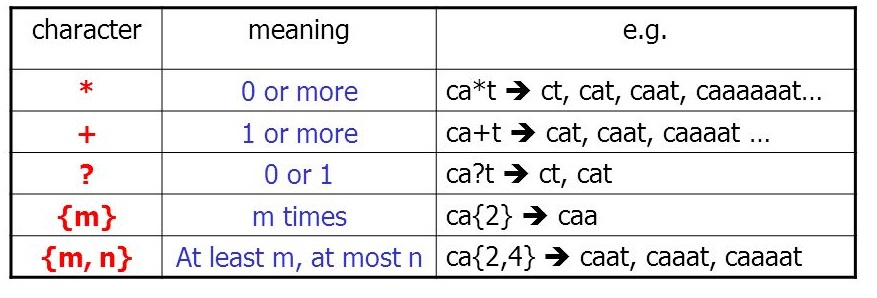

In [4]:
x <- c("apple", "banana", "pear")
str_view(string=x, pattern="an")
# 有时候，我们希望在字符a前后都有字符
str_view(x, ".a.")

[2] │ b<an><an>a

[2] │ <ban>ana
[3] │ p<ear>

In [5]:
x <- c("apple", "banana", "pear")
str_view(x, "^a")
str_view(x, "a$")
str_view(x, "^apple$")

[1] │ <a>pple

[2] │ banan<a>

[1] │ <apple>

In [6]:
# 字符类与字符选项
str_view(c("grey", "gray"), "gr[ea]y")

[1] │ <grey>
[2] │ <gray>

In [13]:
# 控制匹配次数
x <- "Roman numerals: MDCCCLXXXVIII"
str_view(x, "CC?")
str_view(x, "X+")
str_view(x, "C{2,}")
str_view(x, "C{2,3}")

[1] │ Roman numerals: MD<CC><C>LXXXVIII

[1] │ Roman numerals: MDCCCL<XXX>VIII

[1] │ Roman numerals: MD<CCC>LXXXVIII

[1] │ Roman numerals: MD<CCC>LXXXVIII

[1] │ Roman numerals: MDCC<CLXXX>VIII

[1] │ Roman numerals: MDCC<CLX>XXVIII

In [14]:
# 控制匹配次数
# 让* + 变得不贪婪
x <- "Roman numerals: MDCCCLXXXVIII"
str_view(x, "CLX+")
str_view(x, "CLX+?")

[1] │ Roman numerals: MDCC<CLXXX>VIII

[1] │ Roman numerals: MDCC<CLX>XXVIII

### 5 分组与回溯引用
- `.` 是匹配任何字符
- `(.)` 将匹配项括起来，它就用了一个名字，叫`\\1`； 如果有两个括号，就叫`\\1`和`\\2`
- `\\1` 表示回溯引用，表示引用`\\1`对于的`(.)`

`(.)\\1`的意思就是，匹配到了字符，后面还希望有个同样的字符

In [15]:
ft <- fruit %>% head(10)
ft

[1] "apple"        "apricot"      "avocado"      "banana"       "bell pepper" 
 [6] "bilberry"     "blackberry"   "blackcurrant" "blood orange" "blueberry"

In [17]:
# 我们想看看这些单词里，有哪些字母是重复两次的，比如aa, pp. 
# 如果用上面学的方法
str_view(ft, ".{2}", match=TRUE)
# 发现和我们的预想不一样。
str_view(ft, "(.)\\1", match=TRUE)

 [1] │ <ap><pl>e
 [2] │ <ap><ri><co>t
 [3] │ <av><oc><ad>o
 [4] │ <ba><na><na>
 [5] │ <be><ll>< p><ep><pe>r
 [6] │ <bi><lb><er><ry>
 [7] │ <bl><ac><kb><er><ry>
 [8] │ <bl><ac><kc><ur><ra><nt>
 [9] │ <bl><oo><d ><or><an><ge>
[10] │ <bl><ue><be><rr>y

 [1] │ a<pp>le
 [5] │ be<ll> pe<pp>er
 [6] │ bilbe<rr>y
 [7] │ blackbe<rr>y
 [8] │ blackcu<rr>ant
 [9] │ bl<oo>d orange
[10] │ bluebe<rr>y

In [19]:
## 如果是匹配abab, wcwc
str_view(ft, "(..)\\1", match=TRUE)

## 如果是匹配abba, wccw
str_view(ft, "(.)(.)\\2\\1", match=TRUE)

[4] │ b<anan>a

[5] │ bell p<eppe>r

### 6 大小写敏感
- `(?i)` 匹配元素不区分大小写

In [32]:
df <- tibble::tribble(
  ~tch_id,  ~online_platform,
      105,          "Google",
      106,            "meet",
      107,            "Zoom",
      108,            "zoom",
      109,     "Google Meet",
      112, "Microsoft Teams",
      113,                NA
)
df

tch_id,online_platform
<dbl>,<chr>
105,Google
106,meet
107,Zoom
108,zoom
109,Google Meet
112,Microsoft Teams
113,NA


In [22]:
# 希望找出线上平台是google和meet的记录，显然Google和google是一个意思，
# 都应该被筛选出
## 方法1 使用stringr::regex()
df %>% 
  filter(
    str_detect(online_platform, regex("google|meet", ignore_case=TRUE))
  )

## 方法2 使用(?i)
df %>% 
  filter(
    str_detect(online_platform, "(?i)google|meet")
  )

tch_id,online_platform
<dbl>,<chr>
105,Google
106,meet
109,Google Meet


tch_id,online_platform
<dbl>,<chr>
105,Google
106,meet
109,Google Meet


## 解决实际问题
### 1 确定一个字符向量是否匹配一种模式
- 实际问题中，想判断是否匹配？可以用到`str_detect()`函数，返回逻辑向量
- 可用在`filter()`函数中，筛选某列符合条件的行
- `stringr::words`包含了牛津字典里常用单词
- `str_detect()` 有一个功能类似的函数`str_count()`，区别在于，后者不是简单地返回是或否，而是返回字符串中匹配的数量

In [30]:
y <- c("apple", "banana", "pear")
str_detect(y, "e")

[1]  TRUE FALSE  TRUE

In [43]:
d <- tibble(x=c("apple","banana","pear"))
d
d %>% mutate(has_e = str_detect(x, "e"))
d %>% dplyr::filter(str_detect(x,"e"))

x
<chr>
apple
banana
pear


x,has_e
<chr>,<lgl>
apple,TRUE
banana,FALSE
pear,TRUE


x
<chr>
apple
pear


In [45]:
stringr::words %>% head()

[1] "a"        "able"     "about"    "absolute" "accept"   "account"

In [49]:
## 统计以t开头的单词
sum(str_detect(words, "^t"))
# 以元音结尾的单词，占比多少？
mean(str_detect(words, "[aeiou]$"))

## 所以这里把逻辑向量强制转换为了数字型
str_detect(words, "^t") %>% head()

[1] 65

[1] 0.2765306

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [50]:
# 在数据框里, 看看以x结尾的单词是哪些

tibble(
  word = words
) %>% 
  dplyr::filter(str_detect(word, "x$"))

word
<chr>
box
sex
six
tax


In [51]:
# str_count() 函数，返回字符串中匹配的数量
x <- c("apple", "banana", "pear")
str_count(x, "a")

[1] 1 3 1

In [52]:
tibble(
  word = words
) %>% 
  mutate(
    vowels = str_count(word, "[aeiou]"),
    consonants = str_count(word, "[^aeiou]") # 除了元音字母外的数量
  )

word,vowels,consonants
<chr>,<int>,<int>
a,1,0
able,2,2
about,3,2
absolute,4,4
accept,2,4
account,3,4
achieve,4,3
across,2,4
act,1,2


### 2 确定匹配的位置
- 正则表达式不会重叠匹配。比如用`"aba"`去匹配`"abababa"`，肉眼感觉是三次，但正则表达式告诉我们是两次，因为不会重叠匹配
- `str_count()` 统计匹配到的数量
- `str_view_count()` 查看所有匹配到的位置

In [53]:
str_count("abababa", "aba")

[1] 2

In [76]:
str_view_all("abababa", "aba")

[1] │ <aba>b<aba>

### 3 提取匹配的内容
- `str_extract()` 只提取第一个——谁先匹配提取谁
- `str_extract_all()`提取全部匹配到的内容
  - `unnest()`将匹配到的内容分不同行保存, `keep_empty=TRUE`保留无法展开的行
  

In [65]:
colours <- c(
  "red", "orange", "yellow",
  "green", "blue", "purple"
)
colour_match <- str_c(colours, collapse="|")
colour_match1 <- str_c(colours, sep="|")
## 直观的感受下 collapse 和 sep 的区别
colour_match
colour_match1

[1] "red|orange|yellow|green|blue|purple"

[1] "red"    "orange" "yellow" "green"  "blue"   "purple"

In [72]:
str_view("abcd", "ab|cd")
str_view("abcd", "[ab][cd]")

[1] │ <ab><cd>

[1] │ a<bc>d

In [71]:
more <- "It is hard to erase blue or red ink."
str_extract(more, pattern = colour_match)
str_extract_all(more, pattern = colour_match)

[1] "blue"

[[1]]
[1] "blue" "red"

In [79]:
# 取出sentences中，含有有两种和两种颜色以上的句子
more <- sentences[str_count(sentences, colour_match) > 1]
more

tibble(sentence = sentences) %>% 
  filter(str_count(sentence, colour_match) > 1)

[1] "It is hard to erase blue or red ink."          
[2] "The green light in the brown box flickered."   
[3] "The sky in the west is tinged with orange red."

sentence
<chr>
It is hard to erase blue or red ink.
The green light in the brown box flickered.
The sky in the west is tinged with orange red.


In [83]:
# str_extract()提取匹配, 谁先匹配就提取谁
more <- sentences[str_count(sentences, colour_match) > 1]

tibble(x = more) %>% 
  mutate(color = str_extract(x, colour_match))

x,color
<chr>,<chr>
It is hard to erase blue or red ink.,blue
The green light in the brown box flickered.,green
The sky in the west is tinged with orange red.,orange


In [86]:
# str_extract_all()提取全部匹配项
tibble(x = more) %>% 
  mutate(color = str_extract_all(x, colour_match))

tibble(x = more) %>% 
  mutate(color = str_extract_all(x, colour_match)) %>% 
  unnest(color)

x,color
<chr>,<list>
It is hard to erase blue or red ink.,"blue, red"
The green light in the brown box flickered.,"green, red"
The sky in the west is tinged with orange red.,"orange, red"


x,color
<chr>,<chr>
It is hard to erase blue or red ink.,blue
It is hard to erase blue or red ink.,red
The green light in the brown box flickered.,green
The green light in the brown box flickered.,red
The sky in the west is tinged with orange red.,orange
The sky in the west is tinged with orange red.,red


### 4 替换匹配内容
 - `str_replace()`  替换首个匹配
 - `str_replace_all()` 替换所有匹配

In [88]:
x <- c("apple", "pear", "banana")
str_replace(x, "[aeiou]", "-")

[1] "-pple"  "p-ar"   "b-nana"

In [89]:
str_replace_all(x, "[aeiou]", "-")

[1] "-ppl-"  "p--r"   "b-n-n-"

### 5 拆分字符串
- 这个和`str_c()`是相反的操作
- `str_split()` `simplify=TRUE`将其转化为数据框
- `n = 2`：这意味着每个原始字符串最多会被分割成两部分。例如，如果有多个冒号和空格，只会取前两个分隔后的部分。

In [91]:
lines <- "I love my country"
lines
str_split(lines, " ")

[1] "I love my country"

[[1]]
[1] "I"       "love"    "my"      "country"

In [100]:
fields <- c("Name: Hadley", "Country: N: Z", "Age: 35")
fields
fields %>% str_split(": ", n = 2, simplify=TRUE)
fields %>% str_split(": ")
fields %>% str_split(": ", n = 3, simplify=TRUE)

[1] "Name: Hadley"  "Country: N: Z" "Age: 35"

Name,Hadley
Country,N: Z
Age,35


[[1]]
[1] "Name"   "Hadley"

[[2]]
[1] "Country" "N"       "Z"      

[[3]]
[1] "Age" "35"

Name,Hadley,
Country,N,Z
Age,35,


## 进阶部分
带有条件的匹配
### 1 `look ahead`
Windows后面的 `() `是匹配条件，事实上，有四种情形：

- `(?=pattern)` 要求此位置的**后面**必须匹配表达式pattern
- `(?!pattern)` 要求此位置的**后面**不能匹配表达式pattern

### 2 `look behind`
- `(?<=pattern)` 要求此位置的**前面**必须匹配表达式pattern
- `(?<!pattern)` 要求此位置的**前面**不能匹配表达式pattern

In [103]:
# `look ahead`
# 想匹配Windows，同时希望Windows右侧是"95", "98", "NT", "2000"中的一个
win <- c("Windows2000", "Windows", "Windows3.1")
str_view(win, "Windows(?=95|98|NT|2000)")
str_view(win, "Windows(?!95|98|NT|2000)")

[1] │ <Windows>2000

[2] │ <Windows>
[3] │ <Windows>3.1

In [105]:
## look behind
win <- c("2000Windows", "Windows", "3.1Windows")
str_view(win, "(?<=95|98|NT|2000)Windows")
str_view(win, "(?<!95|98|NT|2000)Windows")

[1] │ 2000<Windows>

[2] │ <Windows>
[3] │ 3.1<Windows>

## 案例分析
- `tidyr::extract()`提取匹配到pattern的整个元素，而不是pattern
- `tidyr::extract(x, c(), "pattern")` `c()`将匹配到的元素分成几列的列名，几列与pattern有关，pattern有几个`()`就几列
### 案例1

In [108]:
# 我们希望能提取第二列中的数值，构成新的一列
dt <- tibble(
  x = 1:4,
  y = c("wk 3", "week-1", "7", "w#9")
)
dt

dt %>% 
  mutate(
    z = str_extract(y, "[0-9]"))

x,y
<int>,<chr>
1,wk 3
2,week-1
3,7
4,w#9


x,y,z
<int>,<chr>,<chr>
1,wk 3,3
2,week-1,1
3,7,7
4,w#9,9


### 案例2 

In [113]:
# 提取第二列中的大写字母
df <- data.frame(
  x = seq_along(1:7),
  y = c("2016123456", "20150513", "AB2016123456", "J2017000987", "B2017000987C", "aksdf", "2014")
)
df

df %>% 
  mutate(
    z = str_extract_all(y, "[A-Z]")
  ) %>% 
  tidyr::unnest(z)

x,y
<int>,<chr>
1,2016123456
2,20150513
3,AB2016123456
4,J2017000987
5,B2017000987C
6,aksdf
7,2014


x,y,z
<int>,<chr>,<chr>
3,AB2016123456,A
3,AB2016123456,B
4,J2017000987,J
5,B2017000987C,B
5,B2017000987C,C


### 案例3

In [118]:
# 要求：中英文分开
tb <- tibble(x = c("I我", "love爱", "you你"))
tb
tb %>% 
  tidyr::extract(
    x, c("en", "cn"), "([a-zA-Z]+)([^a-zA-Z]+)",
  remove = FALSE)

x
<chr>
I我
love爱
you你


x,en,cn
<chr>,<chr>,<chr>
I我,I,我
love爱,love,爱
you你,you,你


### 案例4

In [120]:
# 要求：提取起始数字
df <- tibble(x = c("1-12week", "1-10week", "5-12week"))
df

df %>% extract(
  x, c("start", "end", "cn"), "(\\d+)-(\\d+)(\\D+)",
  remove = FALSE)

x
<chr>
1-12week
1-10week
5-12week


x,start,end,cn
<chr>,<chr>,<chr>,<chr>
1-12week,1,12,week
1-10week,1,10,week
5-12week,5,12,week


### 案例5

In [138]:
# 要求：提取大写字母后的数字
df <- tibble(
 x = c("12W34", "AB2C46", "B217C", "akTs6df", "21WD4")
)
df

df %>% 
  mutate(item = str_extract_all(x, "(?<=[A-Z])[0-9]")) %>% 
  tidyr::unnest(item)

x
<chr>
12W34
AB2C46
B217C
akTs6df
21WD4


x,item
<chr>,<chr>
12W34,3
AB2C46,2
AB2C46,4
B217C,2
21WD4,4


In [141]:
# 提取大写字母后的连续数字
df %>% 
  mutate(
    item = str_extract_all(x, "(?<=[A-Z])\\d+")) %>% 
  tidyr::unnest(item)
# 提取数字前大写字母
df %>% 
  mutate(
    item = str_extract_all(x, "[A-Z](?=[0-9])")) %>% 
  tidyr::unnest(item)

x,item
<chr>,<chr>
12W34,34
AB2C46,2
AB2C46,46
B217C,217
21WD4,4


x,item
<chr>,<chr>
12W34,W
AB2C46,B
AB2C46,C
B217C,B
21WD4,D


In [142]:
x <- "Roman numerals: MDCCCLXXXVIII"
str_match_all(x,"C?")

""
""
""
""
""
""
""
""
""
""
""


In [143]:
str_match_all(x, "CC?")

CC
C


### 案例6 

In [151]:
# 提取数字并求和
df <- tibble(
  x = c("1234", "B246", "217C", "2357f", "21WD4")
)
df
df %>% 
  mutate(num = str_extract_all(x, "\\d")) %>% 
  unnest(num) %>% 
  mutate_at(vars(num), as.numeric) %>% 
  group_by(x) %>% 
  summarise(sum = sum(num))

x
<chr>
1234
B246
217C
2357f
21WD4


x,sum
<chr>,<dbl>
1234,10
217C,10
21WD4,7
2357f,17
B246,12


### 案例7
- `tibble::deframe()`将数据框或`tibble`转换为键值对

In [155]:
## 文本替换
text <- "Quantum entanglement is a physical phenomenon that occurs when pairs or groups of particles are generated, interact, or share spatial proximity in ways such that the quantum state of each particle cannot be described independently of the state of the others, even when the particles are separated by a large distance."

pairs <-
  tibble::tribble(
    ~item, ~code,
    "Quantum entanglement", "A01",
    "physical phenomenon", "A02",
    "quantum state", "A03",
    "quantum mechanics", "A04"
  ) %>%
  tibble::deframe()
pairs

text %>% str_replace_all(pairs)

Quantum entanglement  physical phenomenon        quantum state 
               "A01"                "A02"                "A03" 
   quantum mechanics 
               "A04"

[1] "A01 is a A02 that occurs when pairs or groups of particles are generated, interact, or share spatial proximity in ways such that the A03 of each particle cannot be described independently of the state of the others, even when the particles are separated by a large distance."

### 案例8

In [165]:
# 提取Sichuan Univ后面的学院
df <- tibble::tribble(
  ~No, ~address,
    1, "Sichuan Univ, Coll Chem",
    2, "Sichuan Univ, Coll Elect Engn",
    3, "Sichuan Univ, Dept Phys",
    4, "Sichuan Univ, Coll Life Sci",
    5, "Sichuan Univ, Food Engn",
    6, "Sichuan Univ, Coll Phys",
    7, "Sichuan Univ, Sch Business",
    8, "Wuhan Univ, Mat Sci")
df

df %>% 
  mutate(college = str_extract(address, "(?<=Sichuan Univ, ).*")
        ) %>% 
  tidyr::unnest(college, keep_empty=TRUE)

No,address
<dbl>,<chr>
1,"Sichuan Univ, Coll Chem"
2,"Sichuan Univ, Coll Elect Engn"
3,"Sichuan Univ, Dept Phys"
4,"Sichuan Univ, Coll Life Sci"
5,"Sichuan Univ, Food Engn"
6,"Sichuan Univ, Coll Phys"
7,"Sichuan Univ, Sch Business"
8,"Wuhan Univ, Mat Sci"


No,address,college
<dbl>,<chr>,<chr>
1,"Sichuan Univ, Coll Chem",Coll Chem
2,"Sichuan Univ, Coll Elect Engn",Coll Elect Engn
3,"Sichuan Univ, Dept Phys",Dept Phys
4,"Sichuan Univ, Coll Life Sci",Coll Life Sci
5,"Sichuan Univ, Food Engn",Food Engn
6,"Sichuan Univ, Coll Phys",Coll Phys
7,"Sichuan Univ, Sch Business",Sch Business
8,"Wuhan Univ, Mat Sci",NA


In [166]:
df %>% 
  mutate(college = str_remove_all(address, ".*, "))

No,address,college
<dbl>,<chr>,<chr>
1,"Sichuan Univ, Coll Chem",Coll Chem
2,"Sichuan Univ, Coll Elect Engn",Coll Elect Engn
3,"Sichuan Univ, Dept Phys",Dept Phys
4,"Sichuan Univ, Coll Life Sci",Coll Life Sci
5,"Sichuan Univ, Food Engn",Food Engn
6,"Sichuan Univ, Coll Phys",Coll Phys
7,"Sichuan Univ, Sch Business",Sch Business
8,"Wuhan Univ, Mat Sci",Mat Sci


In [167]:
df %>% 
  separate(
    address, 
    into = c("univ", "college"),
    sep = ",",
    remove = FALSE)

No,address,univ,college
<dbl>,<chr>,<chr>,<chr>
1,"Sichuan Univ, Coll Chem",Sichuan Univ,Coll Chem
2,"Sichuan Univ, Coll Elect Engn",Sichuan Univ,Coll Elect Engn
3,"Sichuan Univ, Dept Phys",Sichuan Univ,Dept Phys
4,"Sichuan Univ, Coll Life Sci",Sichuan Univ,Coll Life Sci
5,"Sichuan Univ, Food Engn",Sichuan Univ,Food Engn
6,"Sichuan Univ, Coll Phys",Sichuan Univ,Coll Phys
7,"Sichuan Univ, Sch Business",Sichuan Univ,Sch Business
8,"Wuhan Univ, Mat Sci",Wuhan Univ,Mat Sci


In [170]:
df %>% tidyr::extract(
  address, c("univ", "college"), "(Sichuan Univ), (.+)",
  remove=FALSE)
df %>% tidyr::extract(
  address, c("univ", "college"), "(.*), (.+)",
  remove=FALSE)

No,address,univ,college
<dbl>,<chr>,<chr>,<chr>
1,"Sichuan Univ, Coll Chem",Sichuan Univ,Coll Chem
2,"Sichuan Univ, Coll Elect Engn",Sichuan Univ,Coll Elect Engn
3,"Sichuan Univ, Dept Phys",Sichuan Univ,Dept Phys
4,"Sichuan Univ, Coll Life Sci",Sichuan Univ,Coll Life Sci
5,"Sichuan Univ, Food Engn",Sichuan Univ,Food Engn
6,"Sichuan Univ, Coll Phys",Sichuan Univ,Coll Phys
7,"Sichuan Univ, Sch Business",Sichuan Univ,Sch Business
8,"Wuhan Univ, Mat Sci",NA,NA


No,address,univ,college
<dbl>,<chr>,<chr>,<chr>
1,"Sichuan Univ, Coll Chem",Sichuan Univ,Coll Chem
2,"Sichuan Univ, Coll Elect Engn",Sichuan Univ,Coll Elect Engn
3,"Sichuan Univ, Dept Phys",Sichuan Univ,Dept Phys
4,"Sichuan Univ, Coll Life Sci",Sichuan Univ,Coll Life Sci
5,"Sichuan Univ, Food Engn",Sichuan Univ,Food Engn
6,"Sichuan Univ, Coll Phys",Sichuan Univ,Coll Phys
7,"Sichuan Univ, Sch Business",Sichuan Univ,Sch Business
8,"Wuhan Univ, Mat Sci",Wuhan Univ,Mat Sci
